<a href="https://colab.research.google.com/github/Supritha04/Pytorch/blob/main/DAY10withPyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### DAY 10

Nueral Network Classification

Classification can be of 2 types i.e binary and multi-class classification

### 1. Make classification data and get it ready

In [181]:
import sklearn

In [182]:
from sklearn.datasets import make_circles

In [183]:
# Make 1000 samples
n=1000
# Create circles
x,y=make_circles(n,
                 noise=0.03,
                 random_state=42)

In [184]:
len(x),len(y)

(1000, 1000)

In [185]:
print("First 5 sample of x : \n",x[:5])
print("First 5 sample of y : \n",y[:5])

First 5 sample of x : 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 sample of y : 
 [1 1 1 1 0]


In [186]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [187]:
# Make DataFrame of circle data
import pandas as pd
circles=pd.DataFrame({"x1":x[:,0],
                      "x2":x[:,1],
                      "label":y})
circles.head(10)

,x1,x2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


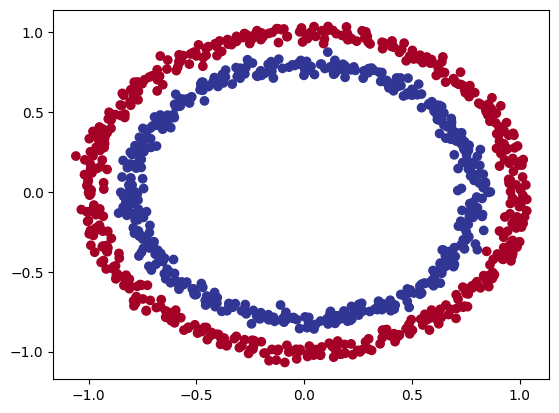

In [188]:
# Visualise
import matplotlib.pyplot as plt
plt.scatter(x=x[:,0],
            y=x[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

### 1.1 Check input and output shapes

In [189]:
x.shape,y.shape

((1000, 2), (1000,))

In [190]:
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [191]:
# View the first example of features and labels
x_sample=x[0]
y_sample=y[0]
print("Values for one sample of x : ",x_sample," and the same for y : ",y_sample)
print("Shape for one sample of x : ",x_sample.shape," and the same for y : ",y_sample.shape)

Values for one sample of x :  [0.75424625 0.23148074]  and the same for y :  1
Shape for one sample of x :  (2,)  and the same for y :  ()


### 1.2 Turn data into tensors and create train and test splits

In [192]:
import torch
torch.__version__

'2.1.0+cu121'

In [193]:
type(x),x.dtype

(numpy.ndarray, dtype('float64'))

In [194]:
# Turn data into tensors
x=torch.tensor(x,dtype=torch.float)
y=torch.tensor(y,dtype=torch.float)

In [195]:
x[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [196]:
y=torch.tensor(y,dtype=torch.float32)

<ipython-input-196-e49a312e2f90>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y=torch.tensor(y,dtype=torch.float32)


In [197]:
type(x),x.dtype,y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [198]:
# Split data into train and test data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,
                                               y,
                                               test_size=0.2,
                                               random_state=42)

In [199]:
len(x_train),len(x_test),len(y_train),len(y_test)

(800, 200, 800, 200)

In [200]:
n

1000

### 2. Building a model

Model to classify blue and red dots

1. setup device agonistic code so our code will run on an accelerator if there is one.
2. Construct a model
3. Define a loss function and optimizer
4. Create a training and test loop

In [201]:
# import PyTorch and nn
import torch
from torch import nn

# Make device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [202]:
x_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Creating a mode
1. Subclasses `nn.module`
2. Create 2 `nn.linear()` layers that are capable of handling the shapes of our data
3. Defines a `forward()` method that outlines the forward pass
4. Instatiate an instance of our model class and send it to target `device`

In [203]:
x_train.shape

torch.Size([800, 2])

In [204]:
y_train[:5]

tensor([1., 0., 0., 0., 1.])

In [205]:
from sklearn import datasets
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1=nn.Linear(in_features=2,out_features=5)
    self.layer_2=nn.Linear(in_features=5,out_features=1)

    self.two_linear_lines=nn.Sequential(
        nn.Linear(in_features=2, out_features=5),
        nn.Linear(in_features=5, out_features=1)
    )

  # 3. Define a forward() method that outlines the forward pass
  def forward(self,x):
    return self.layer_2(self.layer_1(x))
# 4. Instantiate an instance of our model class and send it to the target device
model_0=CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
  (two_linear_lines): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [206]:
device

'cpu'

In [207]:
next(model_0.parameters()).device

device(type='cpu')

In [208]:
# Replicating model above using nn.Sequential()
model_0=nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [209]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[0.2307, 0.3382],
                      [0.3370, 0.3066],
                      [0.0208, 0.1091],
                      [0.2918, 0.2968],
                      [0.0972, 0.5660]])),
             ('0.bias', tensor([-0.1293, -0.1196, -0.3561, -0.3558,  0.0217])),
             ('1.weight',
              tensor([[-0.3475,  0.3545, -0.2755, -0.2535,  0.0699]])),
             ('1.bias', tensor([0.2427]))])

In [210]:
type(x)

torch.Tensor

In [211]:
untrained_preds = model_0(x_test.to(device))
print(f"Length of prediction: {len(untrained_preds)}, shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(x_test)}, shape: {x_test.shape}")
print(f"\nFirst 10 predictions:\n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of prediction: 200, shape: torch.Size([200, 1])
Length of test samples: 200, shape: torch.Size([200, 2])

First 10 predictions:
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], grad_fn=<RoundBackward0>)

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [212]:
x_test[:10],y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### 2.1 Setup loss function and optimizer

For regression MAE or MSE

For classification binary cross entropy or categorical cross entropy (cross entropy)

For optimizers SGD and ADAM

In [213]:
# Setup the loss function
# loss_fn=nn.BCELoss()
loss_fn=nn.BCEWithLogitsLoss() # BCEWithLogitsLoss=sigmoid activation function built-in
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.1)

In [214]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[0.2307, 0.3382],
                      [0.3370, 0.3066],
                      [0.0208, 0.1091],
                      [0.2918, 0.2968],
                      [0.0972, 0.5660]])),
             ('0.bias', tensor([-0.1293, -0.1196, -0.3561, -0.3558,  0.0217])),
             ('1.weight',
              tensor([[-0.3475,  0.3545, -0.2755, -0.2535,  0.0699]])),
             ('1.bias', tensor([0.2427]))])

In [215]:
# Calculate accuracy-out of 100 examples,what percentage does our model get right?
def accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc

### 3. Train model

To build training loop :
1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward
5. Optimizerr step

In [216]:
y_logits=model_0(x_test.to(device))[:5]
y_logits

tensor([[0.3967],
        [0.3629],
        [0.4821],
        [0.3725],
        [0.4769]], grad_fn=<SliceBackward0>)

In [217]:
model_0.eval()
with torch.inference_mode():
  y_logits=model_0(x_test.to(device))[:5]
y_logits

tensor([[0.3967],
        [0.3629],
        [0.4821],
        [0.3725],
        [0.4769]])

In [218]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [219]:
# Using sigma activation function on our model logits
y_pred_probs=torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5979],
        [0.5897],
        [0.6182],
        [0.5921],
        [0.6170]])

In [226]:
y_preds=torch.round(y_pred_probs)

#In full
y_pred_labels=torch.round(torch.sigmoid(model_0(x_test.to(device))))

#Get rid of extra dimensions
y_preds.squeeze()

tensor([1., 1., 1., 1., 1.])

In [227]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### 3.2 Building a training and testing loop

In [228]:
device

'cpu'

In [230]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
# Set number of epochs
epochs=100
# Put data to target device
x_train,y_train=x_train.to(device),y_train.to(device)
x_test,y_test=x_test.to(device),y_test.to(device)
# Build training and evaluation loop
for epoch in range(epochs):
  # Training
  model_0.train()
  # 1. Forward pass
  y_logits=model_0(x_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))
  # 2. Calculate loss/accuracy
  loss=loss_fn(torch.sigmoid(y_logits),
               y_train)
  loss=loss_fn(y_logits,
               y_train)
  acc=accuracy_fn(y_true=y_train,
                  y_pred=y_pred)
  # Optimizer zero grad
  optimizer.zero_grad()

  # Loss backward
  loss.backward()

  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_logits=model_0(x_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

    test_loss=loss_fn(test_logits,
                      y_test)
    test_acc=accuracy_fn(y_true=y_test,
                         y_pred=test_pred)

    if epoch%10==0:
      print(f"Epoch: {epoch}| Loss: {loss:5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}%, Test acc: {test_acc:.2f}%")

Epoch: 0| Loss: 0.717554, Acc: 50.00% | Test loss: 0.71271%, Test acc: 50.00%
Epoch: 10| Loss: 0.703594, Acc: 50.00% | Test loss: 0.70139%, Test acc: 50.00%
Epoch: 20| Loss: 0.697643, Acc: 50.00% | Test loss: 0.69682%, Test acc: 50.00%
Epoch: 30| Loss: 0.695056, Acc: 50.00% | Test loss: 0.69501%, Test acc: 50.00%
Epoch: 40| Loss: 0.693919, Acc: 50.00% | Test loss: 0.69434%, Test acc: 50.00%
Epoch: 50| Loss: 0.693416, Acc: 50.00% | Test loss: 0.69414%, Test acc: 50.00%
Epoch: 60| Loss: 0.693192, Acc: 51.00% | Test loss: 0.69412%, Test acc: 53.00%
Epoch: 70| Loss: 0.693090, Acc: 53.75% | Test loss: 0.69416%, Test acc: 49.00%
Epoch: 80| Loss: 0.693044, Acc: 53.25% | Test loss: 0.69421%, Test acc: 46.00%
Epoch: 90| Loss: 0.693021, Acc: 52.25% | Test loss: 0.69427%, Test acc: 47.00%


### 4. Make predictions and evaluate the model

In [231]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

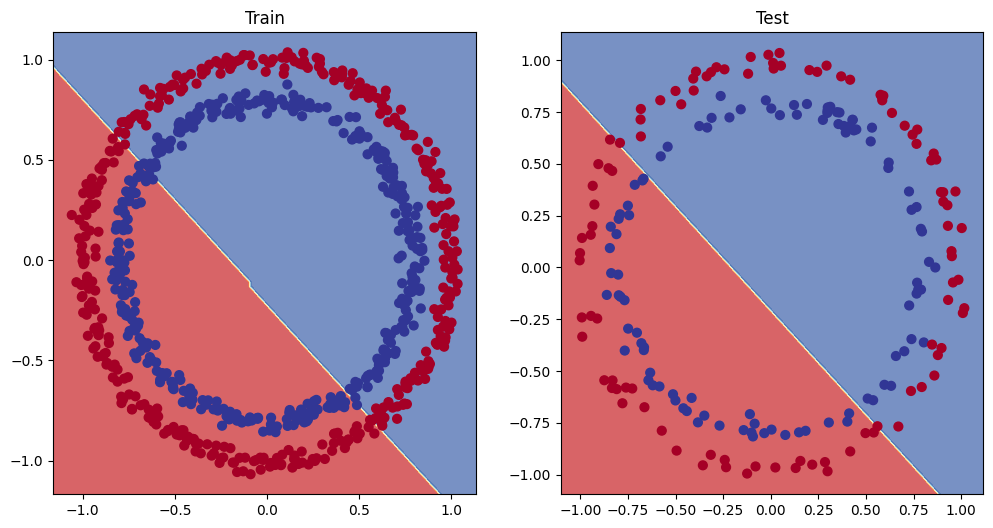

In [232]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, x_test, y_test)

### 5. Improving a model(from a model perspective)

In [233]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[0.2289, 0.3208],
                      [0.3388, 0.3277],
                      [0.0193, 0.0972],
                      [0.2904, 0.2864],
                      [0.0976, 0.5705]])),
             ('0.bias', tensor([-0.0446, -0.2185, -0.2963, -0.3031,  0.0010])),
             ('1.weight',
              tensor([[-0.3059,  0.4166, -0.1856, -0.1513,  0.0980]])),
             ('1.bias', tensor([-0.0165]))])

In [234]:
x_train[:5]

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        [-0.9666, -0.2256],
        [-0.1666,  0.7994]])

In [235]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10) # extra layer
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [236]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_1.parameters(),
                            lr=0.1)

In [237]:
torch.manual_seed(42)

epochs = 1000 # Train for longer

# Put data to target device
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_logits = model_1(x_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> predicition probabilities -> prediction labels

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(x_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100 | Loss: 0.69305, Accuracy: 50.38% | Test loss: 0.69379, Test acc: 48.00%
Epoch: 200 | Loss: 0.69299, Accuracy: 51.12% | Test loss: 0.69437, Test acc: 46.00%
Epoch: 300 | Loss: 0.69298, Accuracy: 51.62% | Test loss: 0.69458, Test acc: 45.00%
Epoch: 400 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69465, Test acc: 46.00%
Epoch: 500 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69467, Test acc: 46.00%
Epoch: 600 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 700 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 900 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%


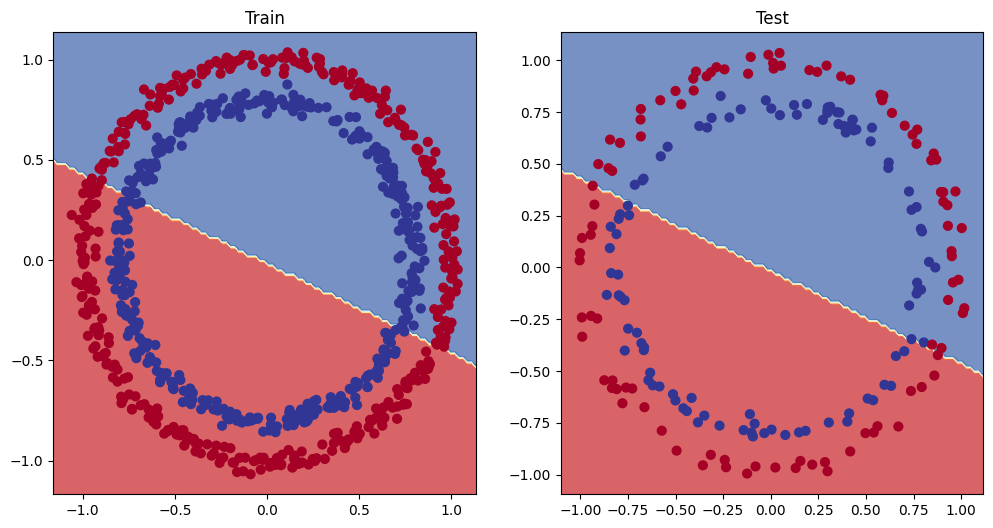

In [238]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, x_test, y_test)

### 5.1 Preparing data to see if our model can fit a straight line

In [239]:
# Create some data
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # linear regression formula

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [240]:
# Create train and test splits
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each
print(len(X_train_regression),
    len(y_train_regression),
    len(X_test_regression),
    len(y_test_regression))

80 80 20 20


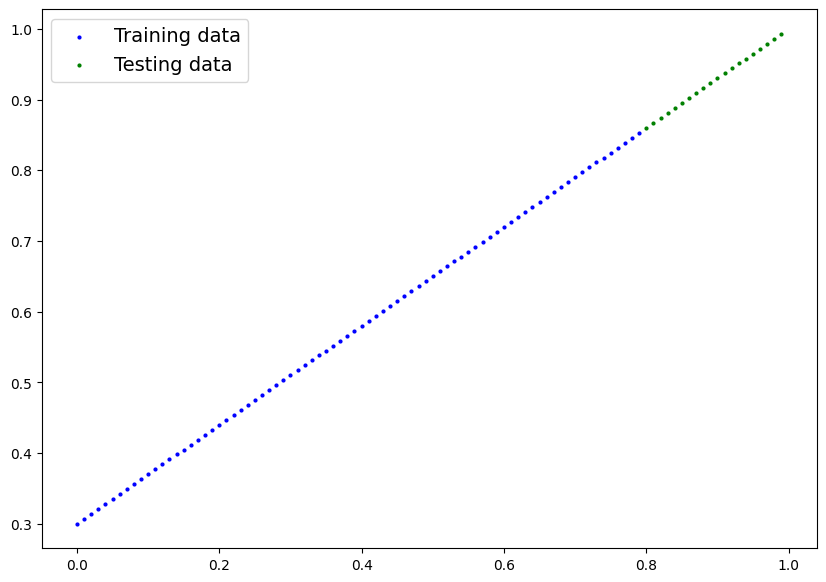

In [241]:
plot_predictions(train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression);

### 5.2 Adjusting model_1 to fit a straight line

In [242]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [243]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

In [244]:
# Train the model
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data to target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_pred = model_2(X_train_regression)

    # 2. Calculate loss (no accuracy since it's a regression problem, not classification)
    loss = loss_fn(y_pred, y_train_regression)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Testing
    model_2.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_pred = model_2(X_test_regression)
      # 2. Calculate the loss
      test_loss = loss_fn(test_pred, y_test_regression)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 0.75986, Test loss: 0.54143
Epoch: 100 | Train loss: 0.09309, Test loss: 0.02901
Epoch: 200 | Train loss: 0.07376, Test loss: 0.02850
Epoch: 300 | Train loss: 0.06745, Test loss: 0.00615
Epoch: 400 | Train loss: 0.06107, Test loss: 0.02004
Epoch: 500 | Train loss: 0.05698, Test loss: 0.01061
Epoch: 600 | Train loss: 0.04857, Test loss: 0.01326
Epoch: 700 | Train loss: 0.06109, Test loss: 0.02127
Epoch: 800 | Train loss: 0.05600, Test loss: 0.01425
Epoch: 900 | Train loss: 0.05571, Test loss: 0.00603


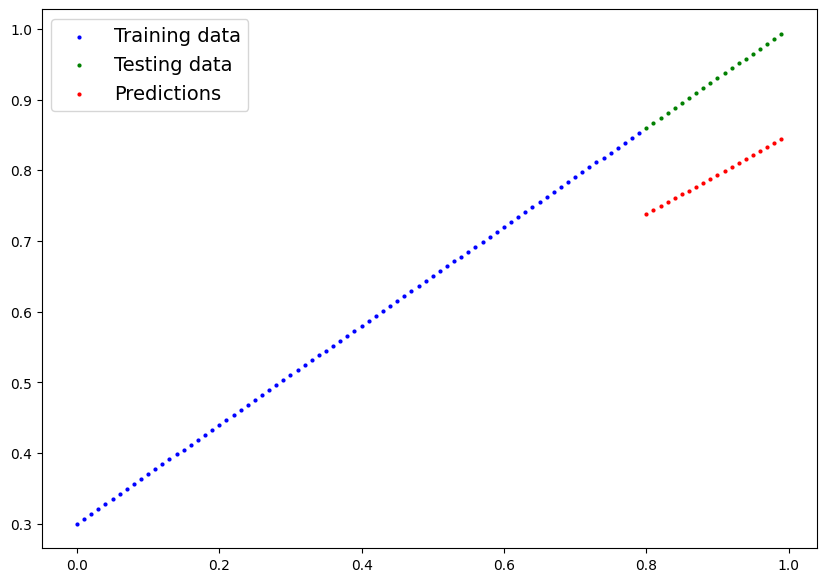

In [245]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

# Plot data and predictions with data on the CPU (matplotlib can't handle data on the GPU)
# (try removing .cpu() from one of the below and see what happens)
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());

### 6. The missing piece: non-linearity

### 6.1 Recreating non-linear data

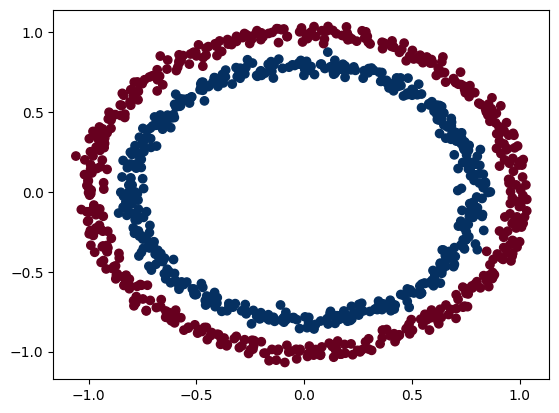

In [246]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=1000,
    noise=0.03,
    random_state=42,
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);